# Notebook for exploration of the mean EEL field


In [182]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option("display.precision", 4)

## 1. Load data into Dataframe

In [183]:
pathdir = '../data/raw'

# List available data files
import glob
listfiles= glob.glob(pathdir+'/'+'*.csv');
print(*listfiles, sep = "\n")


../data/raw/EELCTDandLADCP_refpos_origCTD.csv
../data/raw/EELCTDandLADCP_refdate.csv
../data/raw/EELCTDandLADCP_2Dfield.csv
../data/raw/EELCTDandLADCP_refpos_gvel.csv
../data/raw/EELCTDandLADCP_3Dfield.csv


#### 1.1 Import 3D Fields

In [246]:
file1 = pathdir+'/'+'EELCTDandLADCP_3Dfield.csv'
df3D = pd.read_csv(file1,sep=',', index_col=None, 
                     header=0)
df3D.info()

df3D.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63899 entries, 0 to 63898
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CruiseID     63899 non-null  object 
 1   Staname      63899 non-null  object 
 2   Refdist      63899 non-null  float64
 3   Depth        63899 non-null  int64  
 4   PTMP         63899 non-null  float64
 5   PSAL         63899 non-null  float64
 6   Sigma0       63899 non-null  float64
 7   Vrel         63899 non-null  float64
 8   Vladcp       63899 non-null  float64
 9   Vabs         63899 non-null  float64
 10  Vladcpalong  63899 non-null  float64
dtypes: float64(8), int64(1), object(2)
memory usage: 5.4+ MB


,Refdist,Depth,PTMP,PSAL,Sigma0,Vrel,Vladcp,Vabs,Vladcpalong
count,63899.0000,63899.0000,63899.0000,63899.0000,63899.0000,63899.0000,63899.0000,63899.0000,63899.0000
mean,602.8228,880.8693,6.7927,35.1452,27.5256,0.0047,0.0064,0.0066,0.0047
std,345.0351,629.4886,2.5254,0.1705,0.2253,0.0560,0.0933,0.0927,0.0857
min,6.7210,5.0000,2.3920,34.3884,26.1192,-0.2621,-0.4268,-0.4074,-0.5949
25%,312.8866,345.0000,4.1550,34.9752,27.3457,-0.0183,-0.0470,-0.0462,-0.0413
50%,518.5287,765.0000,7.2067,35.1427,27.5167,-0.0003,0.0016,0.0036,0.0023
75%,954.2958,1335.0000,9.0423,35.2917,27.7346,0.0225,0.0594,0.0593,0.0467
max,1237.8693,2685.0000,14.1812,35.5419,27.9277,0.5596,0.4528,0.5088,0.4642


\
### Visual check of data quality

Data Distribution

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd44139bca0>,
      dtype=object)

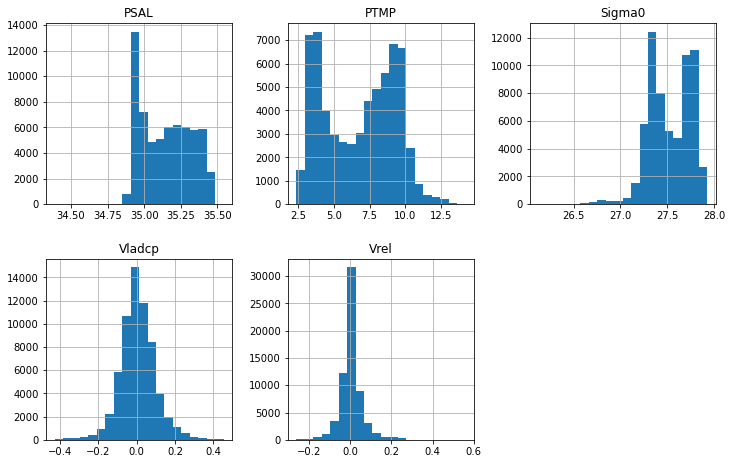

In [256]:
# Define variable of interest 
VOI=['PTMP','PSAL','Sigma0','Vladcp','Vrel']

# Plot data distribution for quick check 
df3D[VOI].hist(bins=20, figsize=(12,12), layout=(3, 3))

\
#### Relationship between Temperature and salinity data

In [299]:
import seaborn as sns
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [10, 10]})


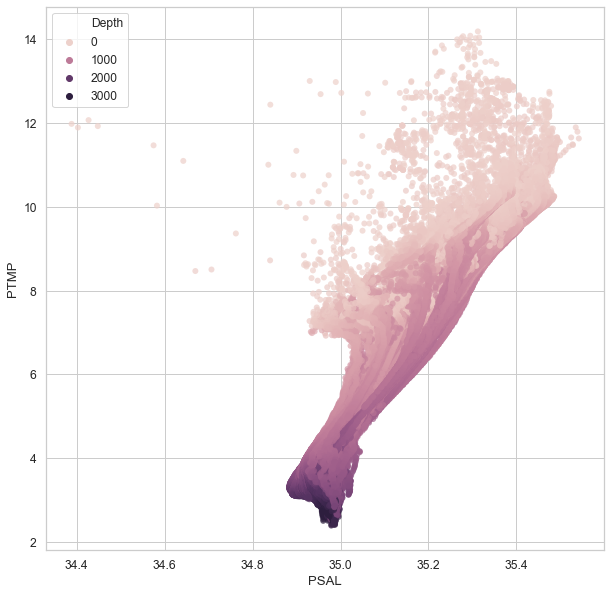

In [300]:
plt.figure()
scatplot=sns.scatterplot(x=df3D['PSAL'], y=df3D['PTMP'],
                hue=df3D['Depth'],
                hue_norm=(0, 2500),legend="brief",
                linewidth=0, alpha = 0.7);
scatplot.legend(loc=2)

Different type of jointplot

<Figure size 720x720 with 0 Axes>

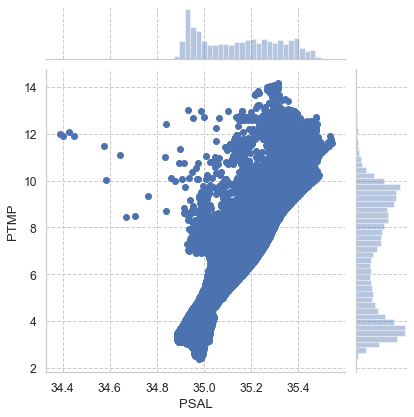

<Figure size 720x720 with 0 Axes>

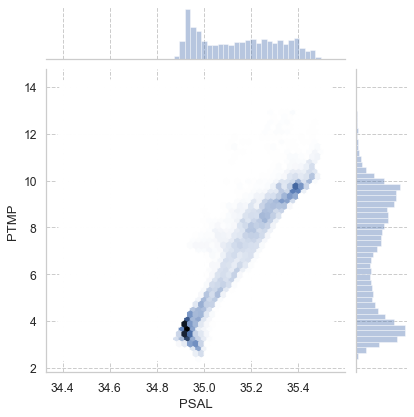

<Figure size 720x720 with 0 Axes>

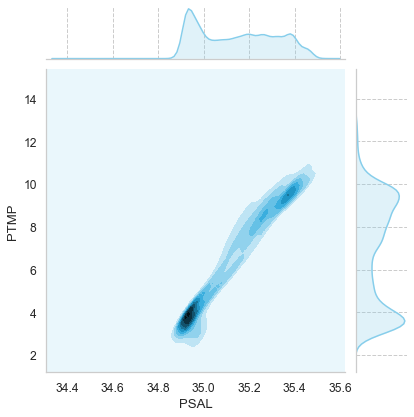

In [305]:
plt.figure(figsize=(10, 10) )
sns.jointplot(x=df3D['PSAL'], y=df3D['PTMP'])

plt.figure(figsize=(10, 10) )
sns.jointplot(x=df3D['PSAL'], y=df3D['PTMP'],kind='hex')

plt.figure(figsize=(10, 10) )
sns.jointplot(x=df3D['PSAL'], y=df3D['PTMP'],kind='kde', color="skyblue")


\
#### Relationship between LADCP velocity and Relative geostrophic velocity data

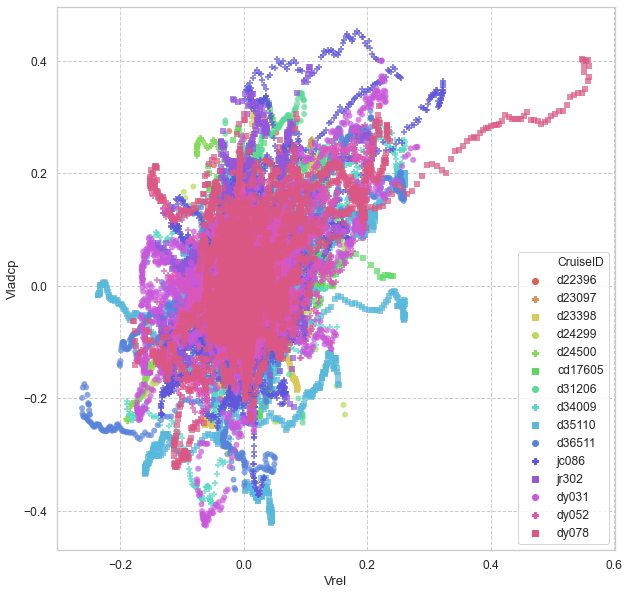

In [326]:
# Define marker of interest
markerstyle = ['o','P','s']

# Create list of marker associated with each unique cruiseID
cruiselist = list(df3D['CruiseID'].unique())
markerlist = [markerstyle[c%len(markerstyle)] for c,values in enumerate(cruiselist,0) ]

# Create markers dictionary that is going to be called in scatterplot
markers = dict(zip(cruiselist, markerlist))

plt.figure()
scatplot=sns.scatterplot(x=df3D['Vrel'], y=df3D['Vladcp'],
                         hue=df3D['CruiseID'],
                         palette='hls',
                         style=df3D['CruiseID'],
                         markers=markers,
                         linewidth=0, 
                         alpha = 0.7);

<Figure size 720x720 with 0 Axes>

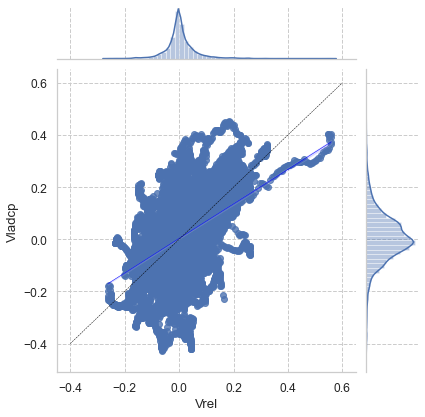

In [353]:
plt.figure(figsize=(10, 10) )
jp=sns.jointplot(x=df3D['Vrel'], y=df3D['Vladcp'],kind='reg',
                joint_kws={'line_kws':{'color':'blue','linewidth':0.5}})

# Plot reference line (Vel_adcp = Relative geostrophic velocity)
jp.ax_joint.plot(np.arange(-0.4,0.61,0.2), np.arange(-0.4,0.61,0.2),
                color="black", linestyle='dashed',linewidth=0.5)



Identify the station corresponding to the suspect data record on dy078 (geostrophic velocity> 0.4 m/s):

In [358]:
print(df3D[df3D['Vrel']>0.4]['Staname'].unique())

['IB9+']


The outliers in geostrophic velocity at IB9 during the DY078 cruise suggest that the level of no motion approximation doesn't held everywhere and all the time...


**More diagnostic on the differences between relative geostrophic velocities and LADCP are done in Notebook 03.**





#### 1.2 Import 2D Fields 

Depth of level of no motion, depth of specific isopycnals, etc.

In [217]:
file2d = pathdir+'/'+'EELCTDandLADCP_2Dfield.csv'
df2D = pd.read_csv(file2d,sep=',', index_col=None, 
                     header=0)
df2D[['Refdist','ZLoNM']] = df2D[['Refdist','ZLoNM']].round(decimals=0)
print(df2D)

     CruiseID Staname  Refdist    LonGV    LatGV  ZLoNM
0      d22396     1G+   1303.0      NaN      NaN    NaN
1      d22396     2G+   1295.0      NaN      NaN    NaN
2      d22396     3G+   1290.0      NaN      NaN    NaN
3      d22396     4G+   1282.0      NaN      NaN    NaN
4      d22396     5G+   1273.0      NaN      NaN    NaN
...       ...     ...      ...      ...      ...    ...
1151    dy078  IB18S+    103.0      NaN      NaN  725.0
1152    dy078  IB19S+     70.0      NaN      NaN  660.0
1153    dy078  IB20S+     40.0 -19.7334  63.0249  595.0
1154    dy078  IB21S+     19.0 -19.9909  63.1745  350.0
1155    dy078  IB22S+      7.0 -20.1419  63.2670    NaN

[1156 rows x 6 columns]


#### 1.3 Import Metadata

In [186]:
# Date of each cruise
file3 = pathdir+'/'+'EELCTDandLADCP_refdate.csv'
dfdate = pd.read_csv(file3,sep=',', index_col=None, 
                     header=0)
print(dfdate)

   CruiseID  Year  Month
0    d22396  1996     10
1    d23097  1997      9
2    d23398  1998      5
3    d24299  1999      9
4    d24500  2000      2
5    d25301  2001     12
6   cd17605  2005     10
7    d31206  2006     10
8    d32107  2007      8
9    d34009  2009      6
10   d35110  2010      5
11   d36511  2011      5
12    jc086  2013      5
13    jr302  2014      7
14    dy031  2015      6
15    dy052  2016      6
16    dy078  2017      5


In [187]:
# Location of EEL stations
file3 = pathdir+'/'+'EELCTDandLADCP_refpos_gvel.csv'
dfloc = pd.read_csv(file3,sep=',', index_col=None, 
                     header=0)
dfloc['Refdist'] = dfloc['Refdist'].round(decimals=1)
dfloc

,Staname,Refdist,RefLonGV,RefLatGV,RefDepthGV
0,1G+,1302.9,-6.2080,56.6750,110.0
1,2G+,1295.3,-6.3250,56.6955,50.0
2,3G+,1289.5,-6.4085,56.7205,92.5
3,4G+,1282.1,-6.5250,56.7330,97.5
4,5G+,1272.9,-6.6750,56.7330,60.0
...,...,...,...,...,...
63,IB18S+,103.1,-19.7510,62.5000,1730.0
64,IB19S+,69.8,-19.6095,62.7920,1535.0
65,IB20S+,40.5,-19.7335,63.0250,1215.0
66,IB21S+,19.4,-19.9915,63.1745,850.0


In [188]:
# Sorted according to distance:
dfs = dfloc.sort_values('Refdist', ascending=True)
print(dfs)

   Staname  Refdist  RefLonGV  RefLatGV  RefDepthGV
67  IB22S+      6.7  -20.1410   63.2665       395.0
66  IB21S+     19.4  -19.9915   63.1745       850.0
65  IB20S+     40.5  -19.7335   63.0250      1215.0
64  IB19S+     69.8  -19.6095   62.7920      1535.0
63  IB18S+    103.1  -19.7510   62.5000      1730.0
..     ...      ...       ...       ...         ...
4      5G+   1272.9   -6.6750   56.7330        60.0
3      4G+   1282.1   -6.5250   56.7330        97.5
2      3G+   1289.5   -6.4085   56.7205        92.5
1      2G+   1295.3   -6.3250   56.6955        50.0
0      1G+   1302.9   -6.2080   56.6750       110.0

[68 rows x 5 columns]


<br><br>
## 2. Create Pivot Tables

#### 2.1 For 3D variables

In [189]:
df3D.groupby(['Staname','Depth'])["Vabs"].mean()

Staname  Depth
13G+     15      -0.0422
         25      -0.0056
         35      -0.0059
         45      -0.0054
         55      -0.0055
                   ...  
T+       65      -0.0187
         75      -0.0221
         85      -0.0605
         95      -0.0624
         105     -0.0635
Name: Vabs, Length: 6517, dtype: float64

In [190]:
df_MVabs = df3D.pivot_table(values="Vabs", index="Depth", columns="Staname")
print(df_MVabs.head())

Staname    13G+    14G+    15G+     8G+     9G+      A+      B+      C+  \
Depth                                                                     
5           NaN     NaN     NaN     NaN     NaN -0.0604  0.0985  0.0729   
15      -0.0422 -0.0383 -0.0582  0.0468 -0.0220 -0.0255 -0.0010  0.0246   
25      -0.0056  0.0195  0.0156  0.0489 -0.0169 -0.0283 -0.0042  0.0409   
35      -0.0059  0.0191  0.0125  0.0472 -0.0085 -0.0282 -0.0049  0.0399   
45      -0.0054  0.0194  0.0111  0.0418 -0.0221 -0.0289 -0.0115  0.0441   

Staname      D+      E+  ...      L+      M+      N+      O+      P+      Q+  \
Depth                    ...                                                   
5        0.0658  0.0087  ... -0.0904     NaN  0.2153  0.0249     NaN  0.1177   
15      -0.0400 -0.0740  ... -0.0838 -0.0760  0.0117  0.0537  0.0703  0.1050   
25      -0.0101 -0.0894  ... -0.0841 -0.0760  0.0103  0.0534  0.0693  0.1075   
35      -0.0107 -0.0918  ... -0.0841 -0.0753  0.0094  0.0591  0.0623  0.10

#### 2.2 For 2D variable (e.g. depth of the level of no motion)

In [191]:
# Create pivot table to calculate the mean level of no motion. Transpose the dataframe for plotting purposes
df_MLoNM = df2D.pivot_table(values="ZLoNM", columns="Staname").T
print(df_MLoNM)

            ZLoNM
Staname          
10G+      48.1250
11G+      45.0000
12G+      76.8750
13G+     110.0000
14G+     110.0000
...           ...
Q+       382.6471
Q1+      837.9412
R+       212.8125
S+       115.7692
T+       110.0000

[67 rows x 1 columns]


In [192]:
# Merge the dataframe with the dataframe containing the reference distance dfs
df_MLoNMnew=pd.merge(dfs,
                    df_MLoNM,
                    how='left',
                    on='Staname')

print(df_MLoNMnew)

   Staname  Refdist  RefLonGV  RefLatGV  RefDepthGV     ZLoNM
0   IB22S+      6.7  -20.1410   63.2665       395.0       NaN
1   IB21S+     19.4  -19.9915   63.1745       850.0  312.0000
2   IB20S+     40.5  -19.7335   63.0250      1215.0  545.4545
3   IB19S+     69.8  -19.6095   62.7920      1535.0  647.2727
4   IB18S+    103.1  -19.7510   62.5000      1730.0  735.0000
..     ...      ...       ...       ...         ...       ...
63     5G+   1272.9   -6.6750   56.7330        60.0   26.4286
64     4G+   1282.1   -6.5250   56.7330        97.5   45.7143
65     3G+   1289.5   -6.4085   56.7205        92.5   63.3333
66     2G+   1295.3   -6.3250   56.6955        50.0   40.0000
67     1G+   1302.9   -6.2080   56.6750       110.0   15.0000

[68 rows x 6 columns]


##### Note: The rows of the new dataframe are sorted according to the reference dataframe, so no further sorting is needed for the 2D variables

<Figure size 432x288 with 0 Axes>

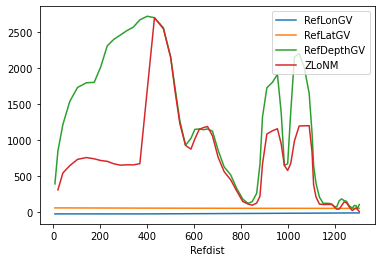

In [221]:
# PLot
plt.figure()
df_MLoNMnew.plot(x='Refdist')

#### Plot Level of no motion for each cruise

Create dataframe of the depth of LoNM as a function of cruise and distance along the section

In [223]:
dftemp = df2D.pivot(index='CruiseID', 
                           columns='Refdist',
                           values='ZLoNM')
dftemp

Refdist,7.0,19.0,40.0,70.0,103.0,141.0,174.0,202.0,230.0,257.0,...,1218.0,1228.0,1238.0,1248.0,1261.0,1273.0,1282.0,1290.0,1295.0,1303.0
CruiseID,,,,,,,,,,,,,,,,,,,,,
cd17605,NaN,120.0,360.0,680.0,770.0,765.0,755.0,770.0,780.0,NaN,...,45.0,45.0,100.0,145.0,75.0,15.0,40.0,65.0,NaN,NaN
d22396,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
d23097,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
d23398,NaN,NaN,NaN,NaN,NaN,NaN,NaN,755.0,755.0,760.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
d24299,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
d24500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,45.0,100.0,145.0,135.0,NaN,NaN,NaN,NaN,NaN,NaN
d25301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,770.0,825.0,805.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
d31206,NaN,325.0,590.0,735.0,815.0,795.0,780.0,770.0,765.0,760.0,...,45.0,95.0,145.0,140.0,85.0,35.0,50.0,65.0,40.0,15.0
d32107,NaN,340.0,585.0,685.0,815.0,855.0,825.0,755.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Get the corresponding cruise year by merging with metadataframe dfdate

<Figure size 864x720 with 0 Axes>

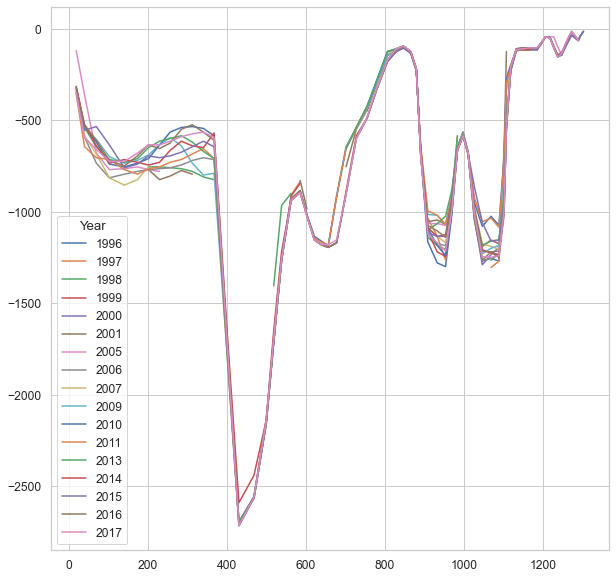

In [284]:
dfLoNMbycruise=pd.merge(dfdate[['CruiseID','Year']],
                    dftemp,
                    how='left',
                    on='CruiseID')

dfLoNMbycruise = dfLoNMbycruise.drop(columns='CruiseID')
dfLoNMbycruise = - dfLoNMbycruise.set_index('Year',drop=True)

dfLoNMbycruiseT = dfLoNMbycruise.T

plt.figure(figsize=(12,10))
dfLoNMbycruiseT.plot()

<br><br>  
## 3. Sort the dataframe columns according to additional metadata (e.g. distance of reference along the section)
##### To reorganise the columns of the pivot table according to the distance of the station on the EEL section, we use the dataframe *dfs*, dfloc sorted on the reference distance 'Refdist'

We defined *list1* as the list of column names (= station names). This list will be used to sort the columns of the dataframes according to the distance of the stations along the EEL section. These reference distances are defined in the file containing the cruises metadata *EELCTDandLADCP_refpos_gvel.csv* which has been loaded earlier in the dataframe *dfs*. The (sorted) column names of the dataframe *dfs* are stored in another list, *list2*.

In [194]:
list1 = list(df_MVabs.columns) 
print(len(list1))

58


<br> List of the reference station from the metadata dataframe dfloc (sorted by distance):

In [195]:
list2 = list(zip(list(dfs.Staname),list(dfs.Refdist)))
print((list2))
print(f"\nLength: {len(list2)}")

[('IB22S+', 6.7), ('IB21S+', 19.4), ('IB20S+', 40.5), ('IB19S+', 69.8), ('IB18S+', 103.1), ('IB17+', 141.1), ('IB16A+', 174.0), ('IB16+', 201.8), ('IB15+', 229.5), ('IB14+', 257.3), ('IB13A+', 285.1), ('IB13+', 312.9), ('IB12A+', 340.7), ('IB12+', 368.4), ('IB11A+', 399.8), ('IB11+', 430.7), ('IB10+', 468.7), ('IB9+', 499.7), ('IB8+', 518.5), ('IB7+', 538.6), ('IB6+', 562.9), ('IB5+', 586.0), ('IB4C+', 602.5), ('IB4B+', 621.5), ('IB4A+', 639.5), ('IB4+', 656.6), ('IB3A+', 677.7), ('IB3+', 701.8), ('IB2A+', 727.5), ('IB2+', 755.3), ('IB1A+', 781.1), ('IB1+', 806.8), ('A+', 828.8), ('B+', 847.0), ('C+', 865.9), ('D+', 879.9), ('E+', 890.8), ('F+', 909.4), ('G+', 932.8), ('H+', 954.3), ('I+', 970.3), ('J+', 983.9), ('K+', 997.9), ('L+', 1011.2), ('M+', 1026.8), ('N+', 1046.8), ('O+', 1069.0), ('P+', 1089.4), ('Q1+', 1101.7), ('Q+', 1108.4), ('R+', 1118.8), ('S+', 1133.1), ('15G+', 1149.6), ('T+', 1164.6), ('14G+', 1175.6), ('13G+', 1186.2), ('12G+', 1196.7), ('11G+', 1207.2), ('10G+', 121

\
list2 has more elements than list1 because the station without enough sampling where not exported in the dataframe df3D (occupied less than 4 times)\
The elements of both lists can be display using the *zip()* function


In [196]:
print(list(zip(list1,list2))[-5:])
# # If rather have a list of list rather than a list of tuples :
# res = [[i, j] for i, j in zip(list1, list2)] 
# print(res)

[('Q+', ('T+', 1164.6)), ('Q1+', ('14G+', 1175.6)), ('R+', ('13G+', 1186.2)), ('S+', ('12G+', 1196.7)), ('T+', ('11G+', 1207.2))]


\
If the two lists are of uneven length, it is better to use the function *itertools.zip_longest()* which  filled-in missing values

In [197]:
import itertools

print(list(itertools.zip_longest(list1,list2))[-5:])

[(None, ('5G+', 1272.9)), (None, ('4G+', 1282.1)), (None, ('3G+', 1289.5)), (None, ('2G+', 1295.3)), (None, ('1G+', 1302.9))]


\
Using list comprehension and the *enumerate()* function to sort list1 elements according to list2 order:

In [198]:
list_r = [[c,values,xref] for xref in list2 for c,values in enumerate(list1,0) if values == xref[0]] 
sampling = list_r[0:5]
print("Samples from reordered list:", *sampling, sep='\n')

Samples from reordered list:
[33, 'IB22S+', ('IB22S+', 6.7)]
[32, 'IB21S+', ('IB21S+', 19.4)]
[31, 'IB20S+', ('IB20S+', 40.5)]
[28, 'IB19S+', ('IB19S+', 69.8)]
[27, 'IB18S+', ('IB18S+', 103.1)]


\
Get the sorting index *ista* from the reordererd list *list_r*:

In [199]:
ista = [item[0] for item in list_r]
print(ista)

[33, 32, 31, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 30, 29, 14, 5, 6, 7, 8, 9, 10, 11, 12, 13, 46, 47, 48, 49, 50, 51, 52, 54, 53, 55, 56, 2, 57, 1, 0, 4, 3]


\
Get the reference distance corresponding to the sorting index *ista* from the reordererd list *list_r*:

In [200]:
refdist3Dfield = [item[2][1] for item in list_r]
print("Reference distance:", *refdist3Dfield)

Reference distance: 6.7 19.4 40.5 69.8 103.1 141.1 174.0 201.8 229.5 257.3 285.1 312.9 340.7 368.4 399.8 430.7 468.7 499.7 518.5 538.6 562.9 586.0 602.5 621.5 639.5 656.6 677.7 701.8 727.5 755.3 781.1 806.8 828.8 847.0 865.9 879.9 890.8 909.4 932.8 954.3 970.3 983.9 997.9 1011.2 1026.8 1046.8 1069.0 1089.4 1101.7 1108.4 1118.8 1133.1 1149.6 1164.6 1175.6 1186.2 1227.7 1237.9


\
##### Display sorted pivot table

In [201]:
sdf_MVabs = df_MVabs.iloc[:,ista]
print(sdf_MVabs.head())


Staname  IB22S+  IB21S+  IB20S+  IB19S+  IB18S+   IB17+  IB16A+   IB16+  \
Depth                                                                     
5        0.0594  0.0067  0.0495 -0.0266     NaN     NaN -0.0436  0.0174   
15       0.0019  0.0241  0.0602 -0.0530 -0.0670 -0.0502 -0.0732 -0.0065   
25       0.0020  0.0245  0.0473 -0.0390 -0.0630 -0.0542 -0.0708 -0.0067   
35       0.0033  0.0231  0.0482 -0.0402 -0.0636 -0.0539 -0.0714 -0.0068   
45       0.0050  0.0214  0.0490 -0.0415 -0.0643 -0.0534 -0.0719 -0.0071   

Staname   IB15+   IB14+  ...     Q1+      Q+      R+      S+    15G+      T+  \
Depth                    ...                                                   
5           NaN     NaN  ...  0.1157  0.1177  0.1197     NaN     NaN     NaN   
15      -0.0409 -0.0530  ...  0.0942  0.1050  0.1077  0.0003 -0.0582 -0.0597   
25      -0.0421 -0.0525  ...  0.0609  0.1075  0.1202  0.0531  0.0156 -0.0206   
35      -0.0433 -0.0523  ...  0.0631  0.1093  0.1203  0.0526  0.0125 -0.01

\
## 4. Load and sort 3D variables the same way


#### 4.1 Other 3D variables

In [202]:
print(df3D.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63899 entries, 0 to 63898
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CruiseID     63899 non-null  object 
 1   Staname      63899 non-null  object 
 2   Refdist      63899 non-null  float64
 3   Depth        63899 non-null  int64  
 4   PTMP         63899 non-null  float64
 5   PSAL         63899 non-null  float64
 6   Sigma0       63899 non-null  float64
 7   Vrel         63899 non-null  float64
 8   Vladcp       63899 non-null  float64
 9   Vabs         63899 non-null  float64
 10  Vladcpalong  63899 non-null  float64
dtypes: float64(8), int64(1), object(2)
memory usage: 5.4+ MB
None


In [203]:
# Calculate standard deviation for the Absolute geostrophic velocity
df_SDVabs = df3D.pivot_table(values="Vabs", index="Depth", columns="Staname",aggfunc=np.std)
sdf_SDVabs = df_SDVabs.iloc[:,ista] # Sort according the stations positions

# Calculate Mean and standard deviation for the direct velocity measured by LADCP
sdf_MVladcp = df3D.pivot_table(values="Vladcp", index="Depth", columns="Staname",aggfunc=np.mean).iloc[:,ista]
sdf_SDVladcp = df3D.pivot_table(values="Vladcp", index="Depth", columns="Staname",aggfunc=np.std).iloc[:,ista]

# Calculate Mean and standard deviation for the geostrophic velocity relative to a level of no motion
sdf_MVrel = df3D.pivot_table(values="Vrel", index="Depth", columns="Staname",aggfunc=np.mean).iloc[:,ista]
sdf_SDVrel = df3D.pivot_table(values="Vrel", index="Depth", columns="Staname",aggfunc=np.std).iloc[:,ista]

# Calculate Mean and standard deviation for the potential temperature
sdf_MPTMP = df3D.pivot_table(values="PTMP", index="Depth", columns="Staname",aggfunc=np.mean).iloc[:,ista]
sdf_SDPTMP = df3D.pivot_table(values="PTMP", index="Depth", columns="Staname",aggfunc=np.std).iloc[:,ista]

# Calculate Mean and standard deviation for the salinity
sdf_MSAL = df3D.pivot_table(values="PSAL", index="Depth", columns="Staname",aggfunc=np.mean).iloc[:,ista]
sdf_SDSAL = df3D.pivot_table(values="PSAL", index="Depth", columns="Staname",aggfunc=np.std).iloc[:,ista]

# Calculate Mean and standard deviation for the potential density
sdf_MSigma0 = df3D.pivot_table(values="Sigma0", index="Depth", columns="Staname",aggfunc=np.mean).iloc[:,ista]
sdf_SDSigma0 = df3D.pivot_table(values="Sigma0", index="Depth", columns="Staname",aggfunc=np.std).iloc[:,ista]



\
### Create a list of the variable to be plotted on contourf subplots

In [204]:
# Create list of dictionaries for variable to plot on the figure with 4x2 subpanels:
# The rows of the figure correpsond to variable (Velocity, Temperature, Salinity, Density) while the columns correspond to the mean and standard deviation

vartoplot=[
    # 1st List correspond to first row of the 4x2 plot (Absolute Velocity)
    [{'Var':'LADCP Vel.', 
      'Type':'Mean', 
      'Data':sdf_MVladcp*100, 
      'cf_levels':np.arange(-16, 20, 4),
      'c_levels':[0,0],
      'cmap':'coolwarm',
      'pltitle':'Mean LADCP Velocity',
      'cbtitle':'cm/s'}, 
     
     {'Var':'LADCP Vel.', 
      'Type':'Std', 
      'Data':sdf_SDVladcp*100,
      'cf_levels':np.arange(0, 18, 4),
      'cmap':'OrRd',
      'pltitle':'STD LADCP Velocity',
      'cbtitle':'cm/s'}
    ],
    
    # 2nd List correspond to 2nd row of the 4x2 plot (Temperature)
    [{'Var':'Pot. Temp.', 
      'Type':'Mean', 
      'Data':sdf_MPTMP, 
      'cf_levels':np.arange(3, 11, 1),
      'cmap':'plasma',
      'pltitle':'Mean Potential Temperature',
      'cbtitle':'$^\circ$C'}, 
     
     {'Var':'Pot. Temp.', 
      'Type':'Std', 
      'Data':sdf_SDPTMP,
      'cf_levels':np.arange(0, 1.2, 0.2),
      'cmap':'OrRd',
      'pltitle':'STD Potential Temperature',
      'cbtitle':'$^\circ$C'}
    ],  
    
   # 3rd List correspond to 3rd row of the 4x2 plot (Salinity)    
    [{'Var':'Sal.', 
      'Type':'Mean', 
      'Data':sdf_MSAL, 
      'cf_levels':np.arange(34.9, 35.45, 0.05),
      'cmap':'viridis',
      'pltitle':'Mean Pratical Salinity',
      'cbtitle':' '}, 
     
     {'Var':'Sal.', 
      'Type':'Std', 
      'Data':sdf_SDSAL,
      'cf_levels':np.arange(0, 0.12, 0.02),
      'cmap':'OrRd',
      'pltitle':'STD Pratical Salinity',
      'cbtitle':' '}
    ],  
    
   # 4th List correspond to 4th row of the 4x2 plot (Pot. Density)  
    [{'Var':'Pot. Dens. Ano.', 
      'Type':'Mean', 
      'Data':sdf_MSigma0, 
      'cf_levels':np.arange(27.2, 27.9, 0.1),
      'cmap':'cividis_r',
      'pltitle':'Mean Potential Density Anomaly',
      'cbtitle':'kg.m$^{-3}$'}, 
     
     {'Var':'Pot. Dens. Ano', 
      'Type':'Std', 
      'Data':sdf_SDSigma0,
      'cf_levels':np.arange(0, 0.12, 0.02),
      'cmap':'OrRd',
      'pltitle':'STD Potential Density Anomaly',
      'cbtitle':'kg.m$^{-3}$'}
    ], 
]


   
#### Some tests with the list of dictionary created

In [205]:
# Display dictionary entries for elements [0,0] 
print(vartoplot[0][0].keys())

# display a subset of key-values
key_list = ['Var','Type','cmap','pltitle','cbtitle']
[key + ": " + vartoplot[0][0].get(key) for key in key_list]

dict_keys(['Var', 'Type', 'Data', 'cf_levels', 'c_levels', 'cmap', 'pltitle', 'cbtitle'])


['Var: LADCP Vel.',
 'Type: Mean',
 'cmap: coolwarm',
 'pltitle: Mean LADCP Velocity',
 'cbtitle: cm/s']

<br><br>  
## 5. Contourf plots

### a. For direct current measurements, temperature, salinity and density

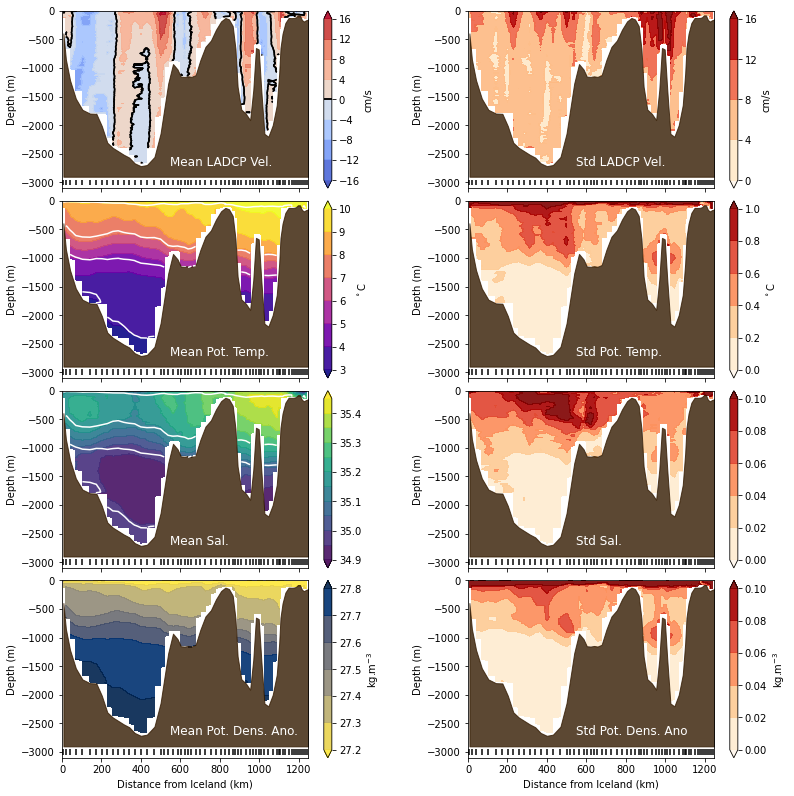

In [206]:
#plt.rcParams.update({'font.size': 10})
    
# Create the figure
## fig, axs = plt.subplots(4, 2, figsize=(12, 12), constrained_layout=True)
fig, axs = plt.subplots(4, 2, sharex=True, figsize=(11, 11))
for row in [0,1,2,3]:
    for col in [0,1]:

        VarDir = vartoplot[row][col]
        var = VarDir['Data'] 
        cf_levels = VarDir['cf_levels'] 
        colmap = getattr(plt.cm, VarDir['cmap'] )
#         if VarDir['cmap'] == 'cividis':
#             colmap = colmap[:-1,:]
        
        pltitle = VarDir['pltitle']
        plunits = VarDir['cbtitle']
        
        X=refdist3Dfield
        Y=var.index.values
        Z=var.values
        Xi,Yi = np.meshgrid(X, Y)

        ax = axs[row, col]

        CS = ax.contourf(Xi, -Yi, Z, cf_levels, alpha=0.9, cmap=colmap, extend='both');
        
        if 'c_levels' in VarDir:
            c_levels = VarDir['c_levels'] 
            CS2 = ax.contour(CS, levels=c_levels, colors='k')

        # Plot specific potential density contour on temperature and salinity field, 
        # indicating of different water masses
        c_WM = [27.20,27.50,27.70,27.85]
        
        if (row in [1,2]) & (col ==0):
            CS_WM = ax.contour(Xi, -Yi, sdf_MSigma0, levels=c_WM, colors='w' )
            # clab=ax.clabel(CS_WM, CS_WM.levels, fmt='%1.2f', inline=True, fontsize=10)
            
            
        ax.set_ylabel('Depth (m)')
        ax.set_xlim([0,1250]) 
        ax.set_ylim([-3100,0])    
        
        # ax.set_title(pltitle)
        ax.text(550, -2700, VarDir['Type']+' '+VarDir['Var'], fontsize=12, color ='white' )
            
        # Make a colorbar for the ContourSet returned by the contourf call.
        cbar = fig.colorbar(CS, ax=ax)
        cbar.ax.set_ylabel(plunits)
        #cbar.ax.set_ylabel('m/s')
                
        # Add the contour line levels to the colorbar
        if 'c_levels' in VarDir:        
            cbar.add_lines(CS2)

        # Add bathymetry (from the nominal depth of the reference EEL stations)
        ax.fill_between(dfs['Refdist'], -dfs['RefDepthGV'], -2900, color="#331a00", alpha=0.8)
        
        ax.vlines(dfs['Refdist'], -3050, -2950, colors='k')

        if row ==3:
            ax.set_xlabel('Distance from Iceland (km)')
            
plt.tight_layout(pad=0.5,w_pad=3)          
plt.savefig('figures/'+'02_figure4x2.pdf')       

### b. For and absolute geostrophic velocity, relative geostrophic velocity 

In [207]:
# Create 2nd list of dictionaries for variable to plot on the "diagnostic figure" comparing the mean and standard deviation from:
# 1) the mean LADCP velocity, 2) the geostrophic velocity relative to LoNM, 3) the absolute velocity (relative geostrophic velocity reference to depth-average LADCP)

vartoplot_diag=[
    # 1st List correspond to first row of the 3x2 plot (LADCP Velocity)
    [{'Var':'LADCP Vel.', 
      'Type':'Mean', 
      'Data':sdf_MVladcp*100, 
      'cf_levels':np.arange(-16, 20, 4),
      'c_levels':[0,0],
      'cmap':'coolwarm',
      'pltitle':'Mean LADCP Velocity',
      'cbtitle':'cm/s'}, 
     
     {'Var':'LADCP Vel.', 
      'Type':'Std', 
      'Data':sdf_SDVladcp*100,
      'cf_levels':np.arange(0, 18, 4),
      'cmap':'OrRd',
      'pltitle':'STD LADCP Velocity',
      'cbtitle':'cm/s'}
    ],

    # 2nd List correspond to 2nd row of the 3x2 plot (Relative Geostrophic Velocity)
    [{'Var':'Rel. Gvel.', 
      'Type':'Mean', 
      'Data':sdf_MVrel*100, 
      'cf_levels':np.arange(-16, 20, 4),
      'c_levels':[0,0],
      'cmap':'coolwarm',
      'pltitle':'Mean Relative Velocity',
      'cbtitle':'cm/s'}, 
     
     {'Var':'Abs. Gvel.', 
      'Type':'Std', 
      'Data':sdf_SDVrel*100,
      'cf_levels':np.arange(0, 18, 4),
      'cmap':'OrRd',
      'pltitle':'STD Relative Velocity',
      'cbtitle':'cm/s'}
    ],
    
    # 3rd List correspond to 3rd row of the 3x2 plot (Absolute Velocity)
    [{'Var':'Abs. Gvel.', 
      'Type':'Mean', 
      'Data':sdf_MVabs*100, 
      'cf_levels':np.arange(-16, 20, 4),
      'c_levels':[0,0],
      'cmap':'coolwarm',
      'pltitle':'Mean Absolute Velocity',
      'cbtitle':'cm/s'}, 
     
     {'Var':'Abs. Gvel.', 
      'Type':'Std', 
      'Data':sdf_SDVabs*100,
      'cf_levels':np.arange(0, 18, 4),
      'cmap':'OrRd',
      'pltitle':'STD Absolute Velocity',
      'cbtitle':'cm/s'}
    ],
]


Create figure for LADCP, relative geostrophic velocity and absolute geostrophic velocity

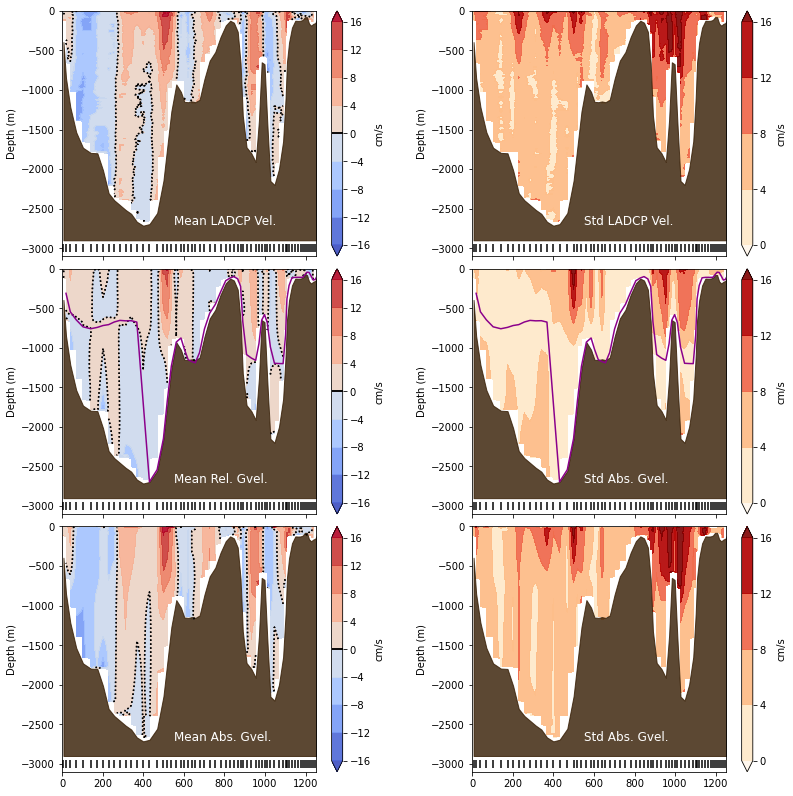

In [213]:
# Create Figure
fig, axs = plt.subplots(3,2, sharex=True, figsize=(11, 11))
for row in [0,1,2]:
    for col in [0,1]:

        VarDir = vartoplot_diag[row][col]
        var = VarDir['Data'] 
        cf_levels = VarDir['cf_levels'] 
        colmap = getattr(plt.cm, VarDir['cmap'] )
#         if VarDir['cmap'] == 'cividis':
#             colmap = colmap[:-1,:]
        
        pltitle = VarDir['pltitle']
        plunits = VarDir['cbtitle']
        
        X=refdist3Dfield
        Y=var.index.values
        Z=var.values
        Xi,Yi = np.meshgrid(X, Y)

        ax = axs[row, col]

        CS = ax.contourf(Xi, -Yi, Z, cf_levels, alpha=0.9, cmap=colmap, extend='both');
        
        if 'c_levels' in VarDir:
            c_levels = VarDir['c_levels'] 
            CS2 = ax.contour(CS, levels=c_levels, colors='k',linestyles='dotted')

        # Plot level of no motion on relative geostrophic velocity plot
        if row==1:
            CS_WM = ax.plot(df_MLoNMnew['Refdist'], -df_MLoNMnew['ZLoNM'], color='darkmagenta')

           
        ax.set_ylabel('Depth (m)')
        ax.set_xlim([0,1250]) 
        ax.set_ylim([-3100,0])    
        
        # ax.set_title(pltitle)
        ax.text(550, -2700, VarDir['Type']+' '+VarDir['Var'], fontsize=12, color ='white' )
            
        # Make a colorbar for the ContourSet returned by the contourf call.
        cbar = fig.colorbar(CS, ax=ax)
        cbar.ax.set_ylabel(plunits)
        #cbar.ax.set_ylabel('m/s')
                
        # Add the contour line levels to the colorbar
        if 'c_levels' in VarDir:        
            cbar.add_lines(CS2)

        # Add bathymetry (from the nominal depth of the reference EEL stations)
        ax.fill_between(dfs['Refdist'], -dfs['RefDepthGV'], -2900, color="#331a00", alpha=0.8)
        
        ax.vlines(dfs['Refdist'], -3050, -2950, colors='k')

        if row ==3:
            ax.set_xlabel('Distance from Iceland (km)')
            
plt.tight_layout(pad=0.5,w_pad=3)          
plt.savefig('figures/'+'02_figurediag3x2.pdf')       

Mean level of no motion used for Relative geostrophic velocity plot is display in purple